<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/Practica-2-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Práctica 2</h1>

<h2>Redes CNN</h2>

Continuaremos con el trábado en el dataset Fashion MNIST.

<img align="center" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/img/Fashion-MNIST.jpg?raw=1"/>

[Más información sobre el dataset](https://keras.io/api/datasets/fashion_mnist/)

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

#-------- Dataset --------

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

#-------- Reescalamiento --------
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#-------- Codificación vectores de clase --------
print(f"y_train shape (valores de clase):\n{y_train.shape}")
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
print(f"y_train shape (vectores de clase):\n{y_train.shape}")

#-------- Reshape para incluir el número de canales de la imágen --------
print(f"x_train shape (antes):\n{x_train.shape}")
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(f"x_train shape (después):\n{x_train.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
y_train shape (valores de clase):
(60000,)
y_train shape (vectores de clase):
(60000, 10)
x_train shape (antes):
(60000, 28, 28)
x_train shape (después):
(60000, 28, 28, 1)


In [2]:
#Función para graficar las curvas de entrenamiento

import matplotlib.pyplot as plt

def graficar_curvas(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(history.history['loss'],label='Training')
    axs[0].plot(history.history['val_loss'],label='Validation')
    axs[0].set_title('Loss')
    axs[0].legend()
    axs[1].plot(history.history['accuracy'],label='Training')
    axs[1].plot(history.history['val_accuracy'],label='Validation')
    axs[1].set_title('Accuracy')
    axs[1].legend()
    fig.show()

Recordemos el rendimiento de los algoritmos de Machine Learning clásico:

<img align="center" width="40%" src="https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/img/ML-Fashion-Mnist.png?raw=1"/>

El modelo básico trabajado en clase

In [ ]:
'''
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',
                padding="same", strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
'''

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

def build_model(num_filtros=16,num_neuronas_densas=[50], dropout=False, optimizador='adam'):
    model = Sequential()
    model.add(Conv2D(filters=num_filtros,kernel_size=3,activation='relu',
                        padding="same", strides=1,
                        input_shape=(x_train.shape[1], x_train.shape[2], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for k in num_neuronas_densas:
        model.add(Dense(k, activation='relu'))
        if dropout:
            model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 50)                156850    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 157520 (615.31 KB)
Trainable params: 157520 (615.31 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [8]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.4771 - accuracy: 0.8321 - val_loss: 0.3721 - val_accuracy: 0.8686
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3257 - accuracy: 0.8847 - val_loss: 0.3119 - val_accuracy: 0.8894
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2776 - accuracy: 0.9011 - val_loss: 0.3031 - val_accuracy: 0.8919
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2471 - accuracy: 0.9097 - val_loss: 0.2731 - val_accuracy: 0.8997
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2211 - accuracy: 0.9190 - val_loss: 0.2737 - val_accuracy: 0.9010
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9272 - val_loss: 0.2573 - val_accuracy: 0.9086
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1785 - accuracy: 0.9340 - val_loss: 0.2569 - val_accuracy:

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5879 - accuracy: 0.9053


[0.5878950357437134, 0.9053000211715698]

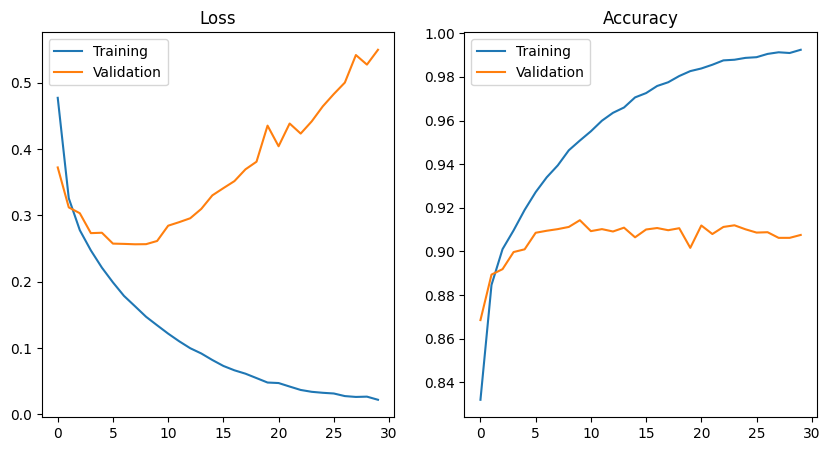

In [10]:
graficar_curvas(history) # Graficar las curvas de entrenamiento

⭕ Práctica

Usando el mismo dataset, implementa las siguientes redes CNN usando como punto de partida la red que hemos implementado, ya sea la versión como función o la *normal* (si te sientes insegura/o respecto a la implementación, no uses el enfoque de función):

* Una red CNN con dos capas convolucionales, en lugar de uno. La segunda capa tendrá las siguientes especificaciones:
 * Una capa convolucional 2D de 8 filtros, el resto de hiperparámetros serán los mismos.
 * Una capa de MaxPooling.
* La red CNN anterior, con las mismas dos capas convolucionales. Cambia la función de activación por `tanh`. ¿Cómo cambian los resultados?
* La red CNN anterior, con las mismas dos capas convolucionales. Cambia el hiperparámetro `padding='valid'`. ¿Qué observas?
* La red CNN anterior, con las mismas dos capas convolucionales. En la parte MLP de la red, agrega 3 capas densas. Usa el número de neuronas en estas capas de tu elección, así como la función de activación en ellas. Experimenta un poco.
* Una red CNN con una capa convolucional con 32 filtros, la parte MLP tendrá un capa oculta de 100 neuronas con activación `relu`. Para el optimizador una un [`SGD`](https://keras.io/api/optimizers/sgd/) con tasa de aprendizaje $0.01$.


### Modelo 1

In [12]:
#Una red CNN con dos capas convolucionales, en lugar de uno. La segunda capa tendrá las siguientes especificaciones:
#- Una capa convolucional 2D de 8 filtros, el resto de hiperparámetros serán los mismos.
#- Una capa de MaxPooling.

def build_model_1(num_filtros=16, num_filtros_2=8, num_neuronas_densas=[50], dropout=False, optimizador='adam'):
    model = Sequential()
    model.add(Conv2D(filters=num_filtros, kernel_size=3, activation='relu', padding="same", strides=1, input_shape=(x_train.shape[1], x_train.shape[2], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=num_filtros_2, kernel_size=3, activation='relu', padding="same", strides=1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for k in num_neuronas_densas:
        model.add(Dense(k, activation='relu'))
        if dropout:
            model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = build_model_1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [14]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5554 - accuracy: 0.8012 - val_loss: 0.4104 - val_accuracy: 0.8572
Epoch 2/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3676 - accuracy: 0.8688 - val_loss: 0.3512 - val_accuracy: 0.8768
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3285 - accuracy: 0.8834 - val_loss: 0.3372 - val_accuracy: 0.8785
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3024 - accuracy: 0.8906 - val_loss: 0.3124 - val_accuracy: 0.8888
Epoch 5/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2829 - accuracy: 0.8963 - val_loss: 0.3090 - val_accuracy: 0.8889
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2664 - accuracy: 0.9028 - val_loss: 0.2805 - val_accuracy: 0.8978
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2534 - accuracy: 0.9074 - val_loss: 0.2740 - val_accuracy:

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8971


[0.3433918356895447, 0.8970999717712402]

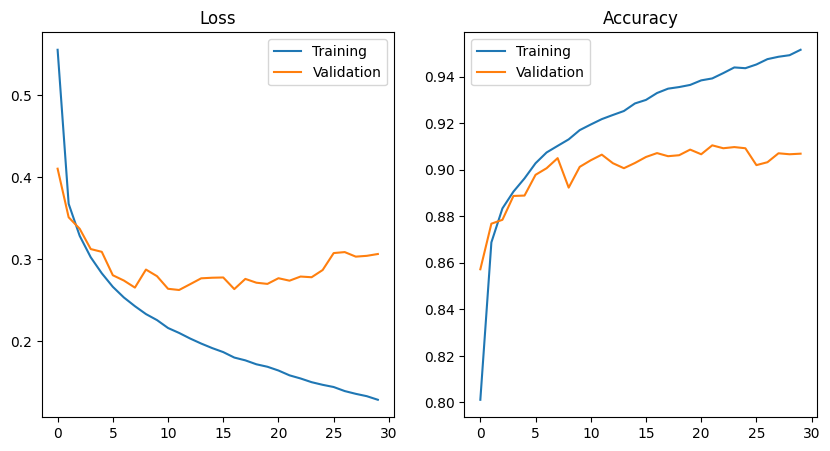

In [16]:
graficar_curvas(history)

### Modelo 2

In [18]:
#Cambia la función de activación por tanh

def build_model_2(num_filtros=16, num_filtros_2=8, num_neuronas_densas=[50], dropout=False, optimizador='adam'):
    model = Sequential()
    model.add(Conv2D(filters=num_filtros, kernel_size=3, activation='tanh', padding="same", strides=1, input_shape=(x_train.shape[1], x_train.shape[2], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=num_filtros_2, kernel_size=3, activation='tanh', padding="same", strides=1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for k in num_neuronas_densas:
        model.add(Dense(k, activation='relu'))
        if dropout:
            model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model = build_model_2()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [20]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5267 - accuracy: 0.8092 - val_loss: 0.4120 - val_accuracy: 0.8480
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3519 - accuracy: 0.8724 - val_loss: 0.3344 - val_accuracy: 0.8789
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3113 - accuracy: 0.8854 - val_loss: 0.3051 - val_accuracy: 0.8874
Epoch 4/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2838 - accuracy: 0.8953 - val_loss: 0.2953 - val_accuracy: 0.8912
Epoch 5/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2660 - accuracy: 0.9021 - val_loss: 0.2799 - val_accuracy: 0.8963
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2493 - accuracy: 0.9085 - val_loss: 0.2835 - val_accuracy: 0.8950
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2371 - accuracy: 0.9121 - val_loss: 0.2649 - val_accuracy:

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.9015


[0.3370477557182312, 0.9014999866485596]

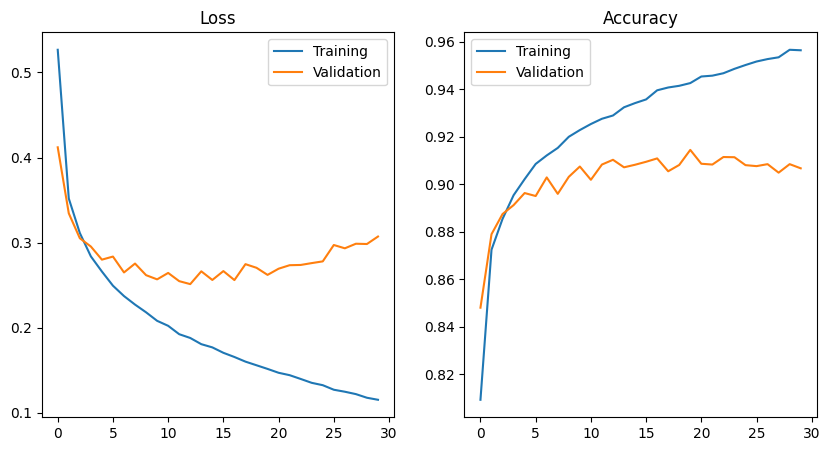

In [22]:
graficar_curvas(history)

### Modelo 3

In [23]:
#Cambia el hiperparámetro padding='valid'

def build_model_3(num_filtros=16, num_filtros_2=8, num_neuronas_densas=[50], dropout=False, optimizador='adam'):
    model = Sequential()
    model.add(Conv2D(filters=num_filtros, kernel_size=3, activation='relu', padding="valid", strides=1, input_shape=(x_train.shape[1], x_train.shape[2], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=num_filtros_2, kernel_size=3, activation='relu', padding="valid", strides=1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for k in num_neuronas_densas:
        model.add(Dense(k, activation='relu'))
        if dropout:
            model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [24]:
model = build_model_3()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 8)         1160      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 50)               

In [25]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.5970 - accuracy: 0.7827 - val_loss: 0.4738 - val_accuracy: 0.8278
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4112 - accuracy: 0.8520 - val_loss: 0.3945 - val_accuracy: 0.8604
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3665 - accuracy: 0.8680 - val_loss: 0.3688 - val_accuracy: 0.8615
Epoch 4/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8773 - val_loss: 0.3378 - val_accuracy: 0.8771
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3182 - accuracy: 0.8823 - val_loss: 0.3393 - val_accuracy: 0.8776
Epoch 6/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3038 - accuracy: 0.8884 - val_loss: 0.3145 - val_accuracy: 0.8848
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2910 - accuracy: 0.8927 - val_loss: 0.3208 - val_accuracy:

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3202 - accuracy: 0.8939


[0.32015013694763184, 0.8938999772071838]

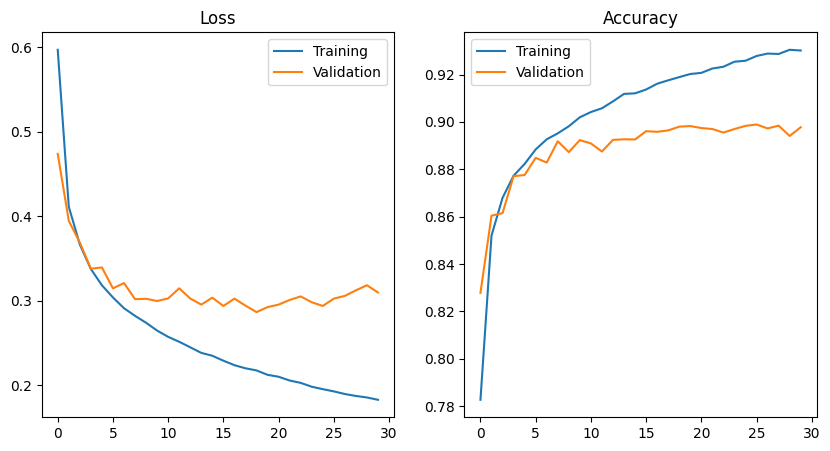

In [27]:
graficar_curvas(history)

### Modelo 4

In [28]:
#Agrega 3 capas densas en la parte MLP de la red

def build_model_4(num_filtros=16, num_filtros_2=8, num_neuronas_densas=[50, 50, 50], dropout=False, optimizador='adam'):
    model = Sequential()
    model.add(Conv2D(filters=num_filtros, kernel_size=3, activation='relu', padding="same", strides=1, input_shape=(x_train.shape[1], x_train.shape[2], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=num_filtros_2, kernel_size=3, activation='relu', padding="same", strides=1))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for k in num_neuronas_densas:
        model.add(Dense(k, activation='relu'))
        if dropout:
            model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
model = build_model_4()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 392)               0         
                                                                 
 dense_8 (Dense)             (None, 50)               

In [30]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5733 - accuracy: 0.7909 - val_loss: 0.4120 - val_accuracy: 0.8483
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3733 - accuracy: 0.8661 - val_loss: 0.3650 - val_accuracy: 0.8697
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3237 - accuracy: 0.8820 - val_loss: 0.3368 - val_accuracy: 0.8776
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2954 - accuracy: 0.8928 - val_loss: 0.3195 - val_accuracy: 0.8812
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2737 - accuracy: 0.8986 - val_loss: 0.3002 - val_accuracy: 0.8892
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2588 - accuracy: 0.9039 - val_loss: 0.2907 - val_accuracy: 0.8896
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2440 - accuracy: 0.9086 - val_loss: 0.2663 - val_accuracy:

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.9008


[0.37136608362197876, 0.9007999897003174]

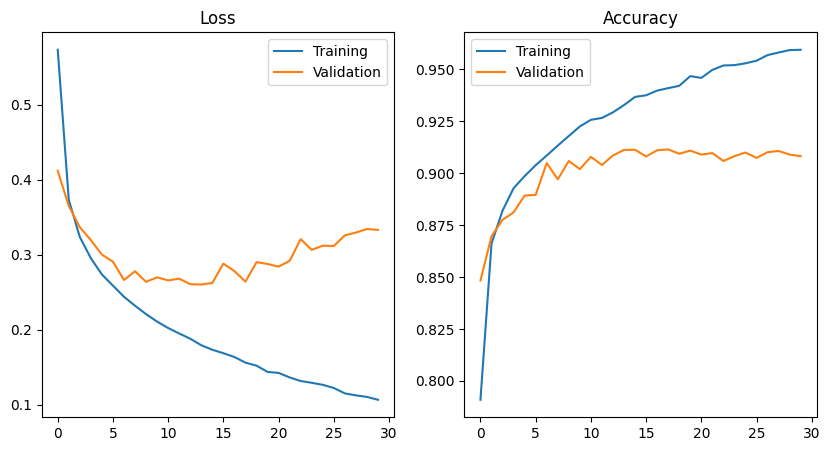

In [32]:
graficar_curvas(history)

### Modelo 5

In [33]:
#Una red CNN con una capa convolucional con 32 filtros, la parte MLP tendrá un capa oculta de 100 neuronas con activación relu.
#Para el optimizador una un SGD con tasa de aprendizaje 0.01

from keras.optimizers import SGD

def build_model_5(num_filtros=32, num_neuronas_densas=[100], dropout=False, optimizador=SGD(learning_rate=0.01)):
    model = Sequential()
    model.add(Conv2D(filters=num_filtros, kernel_size=3, activation='relu', padding="same", strides=1, input_shape=(x_train.shape[1], x_train.shape[2], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    for k in num_neuronas_densas:
        model.add(Dense(k, activation='relu'))
        if dropout:
            model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [34]:
model = build_model_5()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               627300    
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 628630 (2.40 MB)
Trainable params: 628630 (2.40 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [35]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7194 - accuracy: 0.7535 - val_loss: 0.5025 - val_accuracy: 0.8196
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4840 - accuracy: 0.8278 - val_loss: 0.4479 - val_accuracy: 0.8401
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4315 - accuracy: 0.8466 - val_loss: 0.4216 - val_accuracy: 0.8512
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8600 - val_loss: 0.3794 - val_accuracy: 0.8683
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3722 - accuracy: 0.8679 - val_loss: 0.3888 - val_accuracy: 0.8652
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8755 - val_loss: 0.3911 - val_accuracy: 0.8577
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3378 - accuracy: 0.8798 - val_loss: 0.3604 - val_accuracy:

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2846 - accuracy: 0.9003


[0.28457045555114746, 0.9003000259399414]

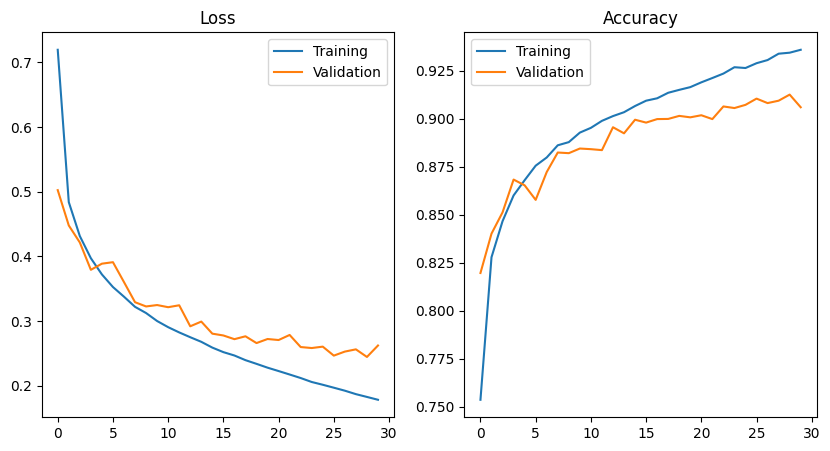

In [37]:
graficar_curvas(history)

## Parte 2

* Implementa una red MLP para este mismo problema. Prueba al menos 3 arquitecturas diferentes, ¿cuál fue la mejor opción? ¿cómo se compara con una CNN?
 * No olvides el conjunto de validación.
 * Usa el callback de `EarlyStopping`.
 * Cuida no re-entrenar modelos.

Para este último punto, usa el siguiente código para preparar el dataset:

In [38]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Shapes al cargar el dataset:")
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print("\nShapes al preprocesar el dataset:")
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

Shapes al cargar el dataset:
X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)

Shapes al preprocesar el dataset:
X train shape: (60000, 784)
y train shape: (60000, 10)
X test shape: (10000, 784)
y test shape: (10000, 10)


In [39]:
# Define una funcion para calcular y mostrar las métricas de evaluacion

from sklearn.metrics import classification_report
import numpy as np

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Loss: {loss}")
    y_test_pred = model.predict(X_test)
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_true_classes = np.argmax(y_test, axis=1)
    print(classification_report(y_test_true_classes, y_test_pred_classes))

### Arquitectura 1

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. 2 capas ocultas de 200 y 100 neuronas con activación relu.
model1 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 200)               157000    
                                                                 
 dense_15 (Dense)            (None, 100)               20100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [43]:
history1 = model1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4836 - accuracy: 0.8257 - val_loss: 0.4259 - val_accuracy: 0.8498
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3593 - accuracy: 0.8674 - val_loss: 0.3967 - val_accuracy: 0.8558
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3248 - accuracy: 0.8796 - val_loss: 0.3682 - val_accuracy: 0.8612
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.8880 - val_loss: 0.3394 - val_accuracy: 0.8799
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2849 - accuracy: 0.8942 - val_loss: 0.3379 - val_accuracy: 0.8760
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2696 - accuracy: 0.8979 - val_loss: 0.3190 - val_accuracy: 0.8863
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2578 - accuracy: 0.9023 - val_loss: 0.3429 - val_accuracy:

In [44]:
print("Model 1:")
evaluate_model(model1, X_test, y_test)

Model 1:
Test Accuracy: 0.8763999938964844
Test Loss: 0.34292301535606384
313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.70      0.76      1000
           3       0.85      0.92      0.88      1000
           4       0.82      0.75      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.62      0.78      0.69      1000
           7       0.96      0.93      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



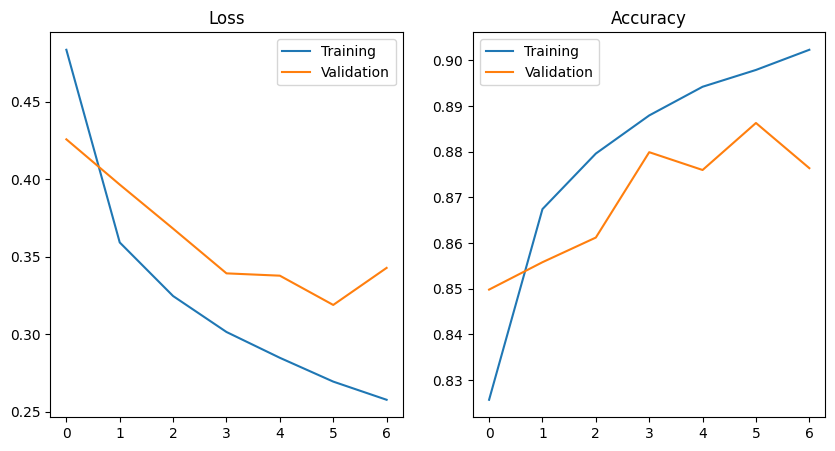

In [45]:
graficar_curvas(history1)

### Arquitectura 2

In [53]:
# 2. 3 capas ocultas de 300, 200 y 100 neuronas con activación relu. Entrena durante 30 épocas.
model2 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [56]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 300)               235500    
                                                                 
 dense_27 (Dense)            (None, 200)               60200     
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [58]:
history2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4808 - accuracy: 0.8253 - val_loss: 0.4008 - val_accuracy: 0.8533
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3622 - accuracy: 0.8675 - val_loss: 0.3783 - val_accuracy: 0.8652
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3277 - accuracy: 0.8799 - val_loss: 0.3801 - val_accuracy: 0.8605
Epoch 3: early stopping


In [59]:
print("Model 2:")
evaluate_model(model2, X_test, y_test)

Model 2:
Test Accuracy: 0.8604999780654907
Test Loss: 0.38013243675231934
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.85      0.91      0.88      1000
           4       0.74      0.82      0.78      1000
           5       0.99      0.90      0.94      1000
           6       0.84      0.41      0.56      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.85     10000
weighted avg       0.87      0.86      0.85     10000



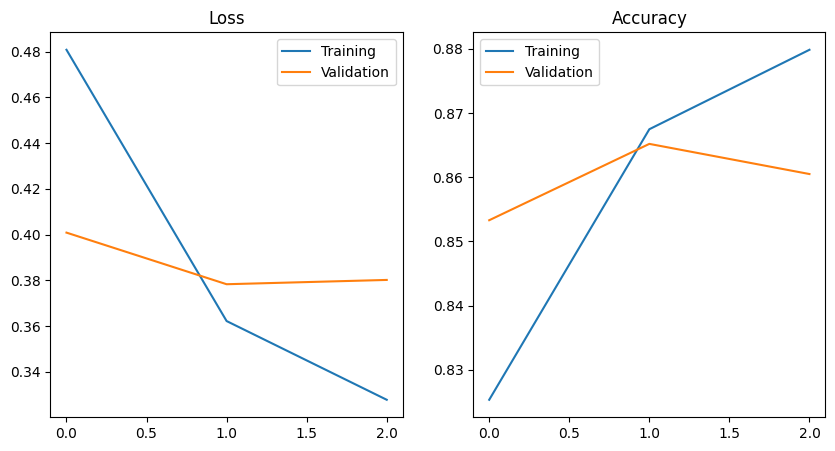

In [60]:
graficar_curvas(history2)

### Arquitectura 3

In [61]:
# 3. 4 capas ocultas de 400, 300, 200 y 100 neuronas con activación relu.
model3 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [62]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 400)               314000    
                                                                 
 dense_31 (Dense)            (None, 300)               120300    
                                                                 
 dense_32 (Dense)            (None, 200)               60200     
                                                                 
 dense_33 (Dense)            (None, 100)               20100     
                                                                 
 dense_34 (Dense)            (None, 10)                1010      
                                                                 
Total params: 515610 (1.97 MB)
Trainable params: 5156

In [63]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [64]:
history3 = model3.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4915 - accuracy: 0.8202 - val_loss: 0.4297 - val_accuracy: 0.8422
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3689 - accuracy: 0.8641 - val_loss: 0.4148 - val_accuracy: 0.8546
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3363 - accuracy: 0.8759 - val_loss: 0.3553 - val_accuracy: 0.8721
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3108 - accuracy: 0.8841 - val_loss: 0.3505 - val_accuracy: 0.8751
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2921 - accuracy: 0.8910 - val_loss: 0.3526 - val_accuracy: 0.8739
Epoch 5: early stopping


In [65]:
print("Model 3:")
evaluate_model(model3, X_test, y_test)

Model 3:
Test Accuracy: 0.8738999962806702
Test Loss: 0.3526427149772644
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.77      0.78      1000
           3       0.91      0.85      0.88      1000
           4       0.70      0.88      0.78      1000
           5       0.97      0.94      0.96      1000
           6       0.73      0.61      0.66      1000
           7       0.95      0.94      0.94      1000
           8       0.97      0.98      0.98      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



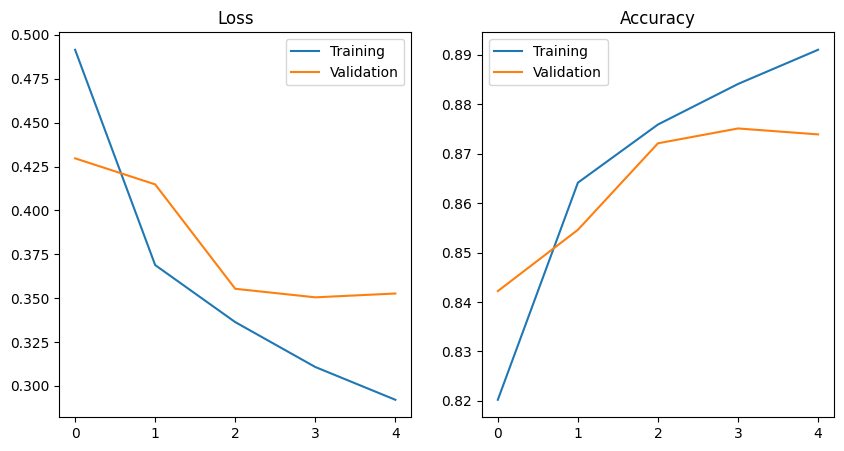

In [66]:
graficar_curvas(history3)

Dudas: mauricio.toledo@unison.mx

Respecto a las dimensiones de salida de una capa convolucional: [wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network#Convolutional_layer), [stackoverflow](https://stackoverflow.com/questions/53580088/calculate-the-output-size-in-convolution-layer).